### LinearRegression, Ridge, Lasso 성능 비교

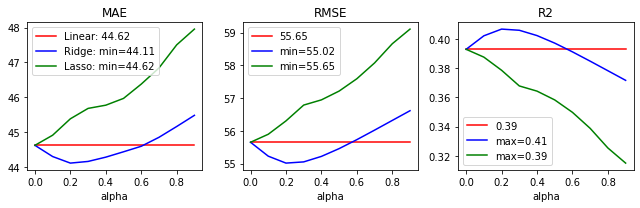

In [1]:
# Linear Regression을 위한 라이브러리 로드
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Ridge, Lasso 라이브러리 로드
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings(action='ignore')

# 당뇨병 데이터셋 로드
diabetes = load_diabetes()

# 데이터셋 로드
X = diabetes["data"]
y = diabetes["target"]
X_trn, X_test, y_trn, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 평가 지표 계산 함수 정의
def get_metrics(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    
    return mae, rmse, r2

# 주어진 회귀 방법에 따른 평가 지표 계산 함수 정의
def get_metrics_list(X_trn, X_test, y_trn, y_test, regressor, regulation=True):
    maes, rmses, r2s = [], [], []
    alphas = list(np.arange(0, 1, 0.1, dtype="float"))    
    
    for a in alphas:
        if regulation:
            clf = regressor(alpha=a)
        else:
            clf = regressor()
            
        clf.fit(X_trn, y_trn)
        y_pred = clf.predict(X_test)

        mae, rmse, r2 = get_metrics(y_test, y_pred)
        maes.append(mae)
        rmses.append(rmse)
        r2s.append(r2)            
    
    return alphas, maes, rmses, r2s

# 회귀 모델 학습
alphas, maes_lr, rmses_lr, r2s_lr = get_metrics_list(X_trn, X_test, y_trn, y_test, LinearRegression, regulation=False)
alphas, maes_rg, rmses_rg, r2s_rg = get_metrics_list(X_trn, X_test, y_trn, y_test, Ridge, regulation=True)
alphas, maes_ls, rmses_ls, r2s_ls = get_metrics_list(X_trn, X_test, y_trn, y_test, Lasso, regulation=True)

# 결과 시각화
fig, axs = plt.subplots(ncols=3, figsize=(9, 3))
axs[0].plot(alphas, maes_lr, c="r", label=f"Linear: {maes_lr[0]:0.2f}")
axs[0].plot(alphas, maes_rg, c="b", label=f"Ridge: min={min(maes_rg):0.2f}")
axs[0].plot(alphas, maes_ls, c="g", label=f"Lasso: min={min(maes_ls):0.2f}")
axs[0].set_title("MAE")
axs[0].set_xlabel("alpha")
axs[0].legend()
axs[1].plot(alphas, rmses_lr, c="r", label=f"{rmses_lr[0]:0.2f}")
axs[1].plot(alphas, rmses_rg, c="b", label=f"min={min(rmses_rg):0.2f}")
axs[1].plot(alphas, rmses_ls, c="g", label=f"min={min(rmses_ls):0.2f}")
axs[1].set_title("RMSE")
axs[1].set_xlabel("alpha")
axs[1].legend()
axs[2].plot(alphas, r2s_lr, c="r", label=f"{r2s_lr[0]:0.2f}")
axs[2].plot(alphas, r2s_rg, c="b", label=f"max={max(r2s_rg):0.2f}")
axs[2].plot(alphas, r2s_ls, c="g", label=f"max={max(r2s_ls):0.2f}")
axs[2].set_title("R2")
axs[2].set_xlabel("alpha")
axs[2].legend()
fig.tight_layout()